# Coursework I

This notebook describes the first part of the ML coursework (code).  This part builds on work that you have already done during the labs.  The purpose of this coursework, along with the previous lab work, is to:
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

Notes:
- CW based on work that you did in the lab - don't use libraries that implement kNN or cross-validation.  We want to see your code!
- For more details, read the coursework PDF on learn.gold

In [22]:

%matplotlib inline

from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

# Load the IRIS dataset, as in the labs
iris = datasets.load_iris()
X= iris.data 
y= iris.target 
print(iris.DESCR)
mySeed=1234567

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## 1. Exploratory Data Analysis

In Lab 2, we discussed how the first part of tackling an ML problem is visualization, in order to understand some of the properties of the problem at-hand.  In the same lab, you were asked to reproduce a figure that plots pairs of features used in our problem.  Fill-in the code you used to plot this figure from Lab 2 in the cell below.  

You should create a function that given data X and labels y plots the 4x4 grid.  The function should be invoked as
    
    myplotGrid(X,y)
    
where X is your training data and y are the labels

In [23]:
def myplotGrid(X,y):
    
    figura = plt.figure(figsize=(15,15)) #actual size of each graph

    counter = 0
    #first for loop, going through all ROWS of dataset
    for rows in range(0,4):
        for col in range(0,4):

            counter += 1

            if rows == col:
                # this creates a 4 by 4 grid 
                ax = figura.add_subplot(4,4,counter) 
                #taking all rows of ith column, drawing the histogram
                ax.hist(X[:, rows]) 

            else:
                ax = figura.add_subplot(4,4,counter)
                ax.scatter(X[:, rows], X[:, col], c=y, cmap=plt.cm.Paired)



### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings (e.g., from webcams or other errors) they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,


    np.random.seed(mySeed) # initialize random seed to replicate results over different runs
    XN=X+np.random.normal(0,0.5,X.shape)
    
and then invoke

    myplotGrid(XN,y)

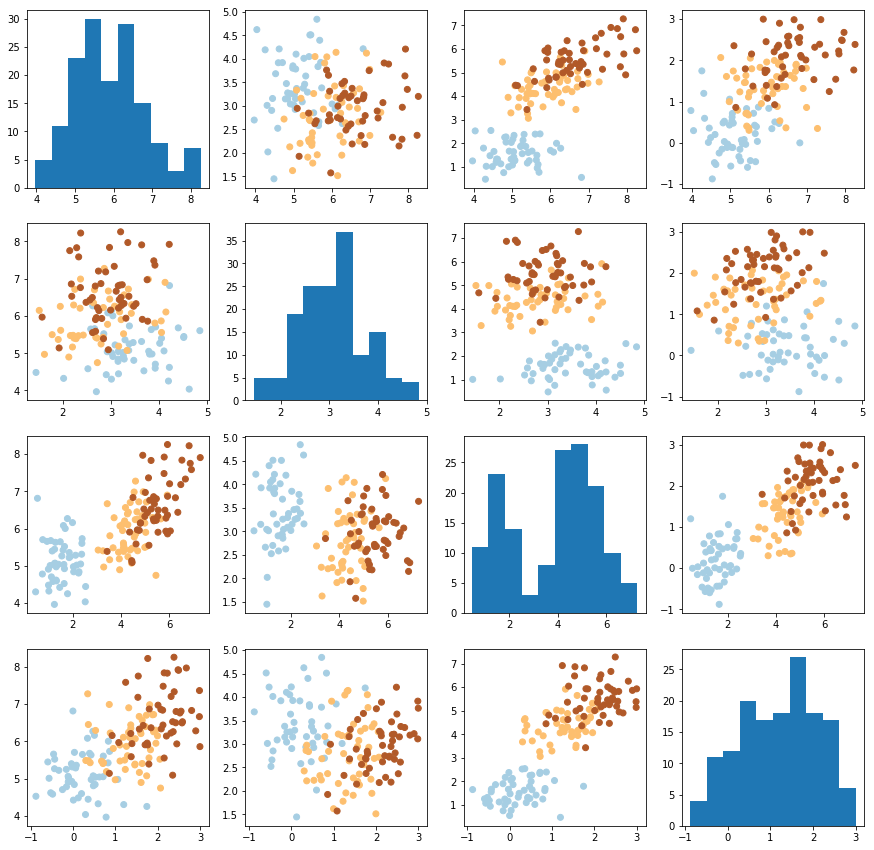

In [34]:
np.random.seed(mySeed) # initialize random seed to replicate results over different runs
XN=X+np.random.normal(0,0.5,X.shape)

myplotGrid(XN,y)
#myplotGrid(X,y)

## 2. Implementing kNN

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You are guided to do this by following the notebook in Lab 4.  Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

In [29]:
shuffled_indices= np.random.permutation(X.shape[0]) 
# TRAINING and TESTING sets
bins = np.array_split(shuffled_indices,2) 
foldTrain = bins[0]
foldTest = bins[1]
X = iris.data
y = iris.target

##=== FUNCTION DEFINITIONS (START)  ===##

#EUCLIDEANDISTANCE FUNCTION returns dist between int1 and int2
def euclideanDistance(x1,x2):
    distance = np.linalg.norm(x1-x2)
    return distance 

#MANHATTANDISTANCE FUNCTION 
def manhattanDistance(m1,m2):
    manhat = sum(np.abs(m1-m2))
    return manhat
                 
#ASSIGN_LABEL FUNCTION
def assignLabel(nLabels):
  # if we have n=1 (one neighbour), then we can just return the label
    if len(nLabels) ==  1:
        return nLabels[0]
    #Count number of occurrences of each value in array of non-negative ints.
    conti = np.bincount(nLabels) 
    #Returns the indices of the maximum values along an axis.
    frequent = np.argmax(conti) 
    return frequent


#GET_NEIGHBOURS FUNCTION  returns the nearest neighbour indices in X of the test point x_.
def getNeighbours(x_,X,n,T,occ): # where T is number of data
    distanze = []
    for i in range(T): #for the whole training data X
        #distance between POINT IN TEST DATA x_ AND training data X
        if occ ==  'euclidean':
            E_Dist = euclideanDistance(x_,X[i])   
        else:
            E_Dist = manhattanDistance(x_,X[i])   
                    
        #append all the distances to the list dist = []
        distanze.append(E_Dist)
    
    distanze = np.argsort(distanze)  #ARGSORT => Returns the indices which would sort an array.
    return distanze[:n]   # RETURNS/OUTPUTS THE INDICES OF THE  of n-nearest neighbours in training data


def mykNN(X, y, X_, n, options):  
    vicini_last = []  
    for i in range(len(X_)):
        x_= X_[i] # test point x_
        vicini = getNeighbours(x_, X, n, X.shape[0], options)
        ys = y[vicini]
        #print(ys)
        label = assignLabel(ys)
        #append all the neighbours to the vicini_last []
        vicini_last.append(label)
    return vicini_last

        
print(mykNN(X[foldTrain], y[foldTrain], X[foldTest], 10, 'euclidean'))    


[0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 1, 2, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 1, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 0, 1, 0, 2, 2, 0, 1, 1, 0, 2, 2, 2, 0, 2, 1, 2, 2, 1, 0, 1, 2, 0, 1, 0, 1, 0, 2, 1]


## 3. Nested Cross-validation using your implementation of KNN

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above.  Again, you are guided to complete this task by following the appropriate notebook in Lab 4.  Your code for nested cross-validation should invoke your kNN function (see above).  You cross validation function should be invoked similary to:

    accuracy_fold=myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan']`` evaluates the two distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 
- you should perform nested cross-validation on both your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should implement/validate at least two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each fold, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)


In [32]:
# ================ N-FOLD NESTED CROSS VALIDATION ============== #  
#OWN ACCURACY FUNCTION
def myAccuracy(y_test, y_pred):
    accuracy = len(np.where(y_test == y_pred)[0])/y_test.size *100
    return accuracy 



def myConfMat(y_test, y_pred, classno):
    # initialize the confusion matrix to zeros
    C = np.zeros((classno,classno), dtype = int)
    #loop through all results and update the confusion matrix
    for i in range(len(y_test)):
        C[y_test[i], y_pred[i]]+=1
    return C


#5-FOLD NESTED CROSS-VALIDATION along with implemenation of k-NN above.

def myNestedCrossVal(X,y,foldK,nns,dists,mySeed):
    np.random.seed(mySeed)
    TEST = [] #list to store testing accuracy
    accuracy_fold = [] #list to store accuracies folds
    
    
    #TASK: use the function np.random.permutation to generate a list of shuffled indices from in the range (0,number of data)
    #USED function array_split to split the indices to foldK different bins (here, 5)
    shuffled_indices = np.random.permutation(X.shape[0])
    bins = np.array_split(shuffled_indices, foldK)
    
    #no need to worry about this, just checking that everything is OK
    assert(foldK==len(bins))
    
    #loop through folds
    for i in range(0,foldK):
        foldTrain=[] # list to save current indices for TRAINING,foldTrain
        foldTest=[]  # list to save current indices for TESTING,foldTest
        foldVal=[]   # list to save current indices for VALIDATION,foldVal

        #loop through all bins, take bin i for testing, #the next bin for validation, and #the rest for training
        foldTest.extend(bins[i])
        
        for b in range(0,len(bins)):
            if b != i:
                foldTrain.extend(bins[b])
                
                
        #CHECKS wherether next BIN is NOT out of bound at the last iteration of the loop. 
        if i+1 > len(bins)-1:    
            foldVal.extend(bins[0])   #beginning one
        else:
            foldVal.extend(bins[i+1]) #otherwise take next BIN for VALIDATION 
                    
        #THIS IS REMOVING bins[i+1] from TRAINING Bins   
        foldTrain = np.setdiff1d(foldTrain, foldVal)  #setdiff1d => Returns the unique values in foldTrain that ARE NOT in foldVal
        foldTrain = foldTrain.tolist()  #tolist() => Returns the array as a (possibly nested) list. 
        
       # print('** Train', len(foldTrain), foldTrain)
       # print('** Val', len(foldVal), foldVal)
       # print('** Test', len(foldTest), foldTest)
        
        
        #no need to worry about this, just checking that everything is OK
        assert not np.intersect1d(foldTest,foldVal)
        assert not np.intersect1d(foldTrain,foldTest)
        assert not np.intersect1d(foldTrain,foldVal)
        
        bestDistance = '' #save the best distance metric here
        bestNN = -1 #save the best number of neighbours here
        bestAccuracy = -10 #save the best attained accuracy here (in terms of validation)
        
        
        #LOOP THROUGH ALL PARAMETERS (ONE FOR LOOP FOR DISTANCE, ONE FOR LOOP FOR NN)
        
        #1 loop for distances
        for d in range(0,len(dists)):
        #1 loop for list of number of neighbours parameter (nns)
            for n in range(0,len(nns)):
                
            # train the classifier on current number of neighbours/distance with mykNN function above
                myPred = mykNN(X[foldTrain], y[foldTrain], X[foldVal], nns[n], dists[d])
                
                #calculate accuracy of Val
                A_Val = myAccuracy(y[foldVal], myPred)
                
                #add the accuracies to TEST LIST 
                TEST.append(A_Val)
                
                # save parameters if results are the best we had
                if np.amax(TEST) > bestAccuracy:
                    bestAccuracy = np.amax(TEST)
                    bestDistance = dists[d]
                    bestNN = TEST.index(np.amax(TEST))+1
        TEST = []
        print('** End of val for this fold, best NN', bestNN, 'best Dist', bestDistance)
        
        #evaluate on test data: extend your training set by including the validation set
        foldTrain.extend(foldVal)
        
        #train mykNN classifier on new training set and test on test set    
       
        y_pred = mykNN(X[foldTrain],y[foldTrain],X[foldTest],bestNN,bestDistance) 
        #get performance on fold
        P_fold = myAccuracy(y[foldTest] ,y_pred)
        #save result in accuracy_fold array
        accuracy_fold.append(P_fold)
        
        print('==== Final Cross-val on test on this fold with NN', bestNN, 'dist', bestDistance, ' accuracy ',myAccuracy(y[foldTest],y_pred))
        print('CONFUSION MATRIX: ', myConfMat(y[foldTest],y_pred,len(np.unique(y))))
    return accuracy_fold

#CALL MY_NESTED_CROSSVALIDATION FUNCITON
accuracy_fold=myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
print(accuracy_fold)

accuracy_fold=myNestedCrossVal(XN,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
print(accuracy_fold)
    

/Users/MIFuad/anaconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:64: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/Users/MIFuad/anaconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:65: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/Users/MIFuad/anaconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:66: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


** End of val for this fold, best NN 3 best Dist euclidean
==== Final Cross-val on test on this fold with NN 3 dist euclidean  accuracy  96.66666666666667
CONFUSION MATRIX:  [[11  0  0]
 [ 0 10  1]
 [ 0  0  8]]
** End of val for this fold, best NN 4 best Dist euclidean
==== Final Cross-val on test on this fold with NN 4 dist euclidean  accuracy  93.33333333333333
CONFUSION MATRIX:  [[12  0  0]
 [ 0 11  0]
 [ 0  2  5]]
** End of val for this fold, best NN 1 best Dist euclidean
==== Final Cross-val on test on this fold with NN 1 dist euclidean  accuracy  93.33333333333333
CONFUSION MATRIX:  [[ 5  0  0]
 [ 0 13  1]
 [ 0  1 10]]
** End of val for this fold, best NN 4 best Dist euclidean
==== Final Cross-val on test on this fold with NN 4 dist euclidean  accuracy  100.0
CONFUSION MATRIX:  [[11  0  0]
 [ 0  7  0]
 [ 0  0 12]]
** End of val for this fold, best NN 1 best Dist euclidean
==== Final Cross-val on test on this fold with NN 1 dist euclidean  accuracy  96.66666666666667
CONFUSION MAT